## Business Case:
The objective of this business case is to analyze historical rainfall data, specifically the maximum rainfall in a day,    the number of rainy days, and the total rainfall for each month and year. By understanding the rainfall patterns, we aim  to identify potential opportunities and challenges for various stakeholders, such as farmers, water management       authorities, and tourism agencies. This analysis can provide valuable insights for decision-making, resource allocation, and risk management related to agriculture, water supply, and tourism activities.

Objective:
The objective of this data analysis is to gain insights into the historical rainfall patterns by examining the maximum rainfall in a day, the number of rainy days, and the total rainfall. Specifically, we aim to achieve the following objectives:

* Identify the months and years with the highest maximum rainfall in a day to understand the periods of intense rainfall.
* Determine the months and years with the highest number of rainy days to assess the frequency and duration of rainy periods.
* Analyze the total rainfall for each month and year to identify the wettest periods and potential trends over time.
* Explore the relationships between different rainfall metrics (e.g., maximum rainfall, rainy days, total rainfall) to understand their interdependencies.
* Generate visualizations and summary statistics to effectively communicate the findings and facilitate decision-making for stakeholders in agriculture, water management, and tourism sectors.
#### By achieving these objectives, this analysis can help stakeholders make informed decisions regarding water resource management, agricultural planning, and tourism activities, considering the historical rainfall patterns and potential implications for their respective industries.

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime as dt
import sweetviz as sv
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
import plotly.graph_objects as go

In [2]:
rain = pd.read_csv('data.csv')

In [3]:
rain.head()

maximum_rainfall_in_a_day  no_of_rainy_days    month  total_rainfall
0                       36.5                10  1982-01           107.1
1                        9.4                 5  1982-02            27.8
2                       61.7                11  1982-03           160.8
3                       45.1                14  1982-04           157.0
4                       33.0                10  1982-05           102.2

In [4]:
# Micro preprocessing by breaking the month column to workaeable pieces of day,month,year.

In [5]:
rain['Date'] = rain['month']

In [6]:
rain.drop('month',axis = 1,inplace = True)

In [7]:
rain['Date'] = pd.to_datetime(rain['Date'])
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day
rain.drop(['Date'], axis = 1,inplace=True) 
rain.head()

maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall  year  month  \
0                       36.5                10           107.1  1982      1   
1                        9.4                 5            27.8  1982      2   
2                       61.7                11           160.8  1982      3   
3                       45.1                14           157.0  1982      4   
4                       33.0                10           102.2  1982      5   

   day  
0    1  
1    1  
2    1  
3    1  
4    1

## BASIC CHECKS

In [8]:
rain.dtypes

maximum_rainfall_in_a_day    float64
no_of_rainy_days               int64
total_rainfall               float64
year                           int64
month                          int64
day                            int64
dtype: object

* Contained float and Interger 64 data types.

In [9]:
rain.duplicated().sum()

0

* No duplicate values in Dataset

In [10]:
rain.isnull().sum()

maximum_rainfall_in_a_day    0
no_of_rainy_days             0
total_rainfall               0
year                         0
month                        0
day                          0
dtype: int64

* No missing values in dataset

In [11]:
rain.tail()

maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall  year  month  \
457                       23.8                 8            65.0  2020      2   
458                       47.4                 8           108.8  2020      3   
459                       51.8                12           188.0  2020      4   
460                       53.8                16           255.6  2020      5   
461                       41.0                21           233.8  2020      6   

     day  
457    1  
458    1  
459    1  
460    1  
461    1

In [12]:
rain.describe().T

count         mean         std     min       25%  \
maximum_rainfall_in_a_day  462.0    52.358225   35.685122     0.2    30.625   
no_of_rainy_days           462.0    13.958874    4.947494     1.0    11.000   
total_rainfall             462.0   176.236580  113.296793     0.2    89.025   
year                       462.0  2000.753247   11.127916  1982.0  1991.000   
month                      462.0     6.461039    3.455574     1.0     3.000   
day                        462.0     1.000000    0.000000     1.0     1.000   

                               50%      75%     max  
maximum_rainfall_in_a_day    43.45    63.15   216.2  
no_of_rainy_days             14.00    18.00    27.0  
total_rainfall              158.45   237.95   765.9  
year                       2001.00  2010.00  2020.0  
month                         6.00     9.00    12.0  
day                           1.00     1.00     1.0

In [13]:
#Since day has Zero standard Deviation,We will drop it since it won't Prvide any additional information. to the ML model.

In [14]:
rain1 = rain.copy()

In [15]:
# Drop the "day" column
rain.drop('day', axis=1,inplace =True )

In [16]:
rain.head()

maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall  year  month
0                       36.5                10           107.1  1982      1
1                        9.4                 5            27.8  1982      2
2                       61.7                11           160.8  1982      3
3                       45.1                14           157.0  1982      4
4                       33.0                10           102.2  1982      5

In [17]:
#Creating Variables to be used for plotting
maximum_rainfall = rain['maximum_rainfall_in_a_day']
no_of_rainy_days = rain['no_of_rainy_days']
total_rainfall = rain['total_rainfall']
year = rain['total_rainfall']
month = rain['month']

In [18]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   maximum_rainfall_in_a_day  462 non-null    float64
 1   no_of_rainy_days           462 non-null    int64  
 2   total_rainfall             462 non-null    float64
 3   year                       462 non-null    int64  
 4   month                      462 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 18.2 KB


In [19]:
#Trend PLots

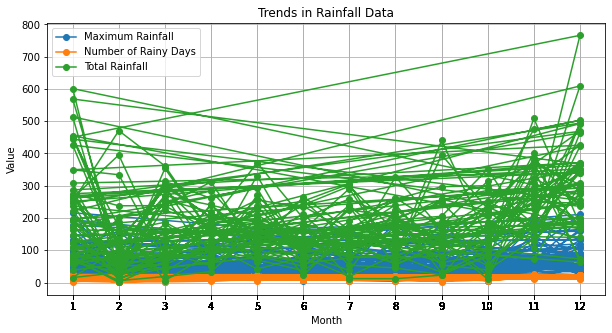

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(month, maximum_rainfall, marker='o', linestyle='-', label='Maximum Rainfall')
plt.plot(month, no_of_rainy_days, marker='o', linestyle='-', label='Number of Rainy Days')
plt.plot(month, total_rainfall, marker='o', linestyle='-', label='Total Rainfall')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Trends in Rainfall Data')
plt.xticks(month)
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#Using Plotly library also to see the trends clearer
# Create traces
trace1 = go.Scatter(x=month, y=maximum_rainfall, mode='lines+markers', name='Maximum Rainfall')
trace2 = go.Scatter(x=month, y=no_of_rainy_days, mode='lines+markers', name='Number of Rainy Days')
trace3 = go.Scatter(x=month, y=total_rainfall, mode='lines+markers', name='Total Rainfall')

# Create layout
layout = go.Layout(
    title='Trends in Rainfall Data',
    xaxis=dict(title='Month', showgrid=True),
    yaxis=dict(title='Value', showgrid=True),
    showlegend=True
)

# Create figure
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Show the figure
fig.show()

* 12TH month recording the heihest Total rainfall according to Plot.
* 1st month recording the heihest maximum rainfall in a Day according to Plot.

### EDA ANSWERING QUESTIONS PER OBJECTIVE CODE WISE.

In [22]:
# Groupby year and month, calculate maximum rainfall, and find the month and year with the highest maximum rainfall
max_rainfall_by_month_year = rain.groupby(['year', 'month'])['maximum_rainfall_in_a_day'].max()
highest_max_rainfall = max_rainfall_by_month_year.idxmax()
highest_month = highest_max_rainfall[1]
highest_year = highest_max_rainfall[0]

# Print the month and year with the highest maximum rainfall
print("Month and Year with the Highest Maximum Rainfall:")
print("Month:", highest_month)
print("Year:", highest_year)

Month and Year with the Highest Maximum Rainfall:
Month: 1
Year: 2011


In [23]:
# Groupby year and month, calculate the sum of total rainfall, and find the wettest period
sum_rainfall_by_month_year = rain.groupby(['year', 'month'])['total_rainfall'].sum()
wettest_period = sum_rainfall_by_month_year.nlargest(1)

# Print the wettest period (month and year)
print("Wettest Period (Month and Year):")
for period, rainfall in wettest_period.items():
    year, month = period
    print("Month:", month)
    print("Year:", year)
    print("Total Rainfall:", rainfall)
    print()

Wettest Period (Month and Year):
Month: 12
Year: 2006
Total Rainfall: 765.9



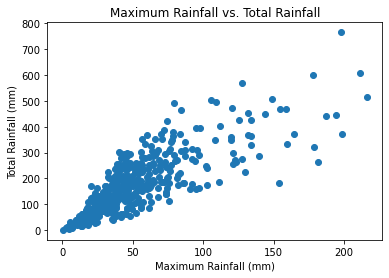

In [24]:
# Scatter plot: Maximum rainfall vs. Total rainfall
plt.scatter(rain['maximum_rainfall_in_a_day'], rain['total_rainfall'])
plt.xlabel('Maximum Rainfall (mm)')
plt.ylabel('Total Rainfall (mm)')
plt.title('Maximum Rainfall vs. Total Rainfall')
plt.show()


* This indicates a clear positive linear relationship between the total  Rainfall and Maximum Rainfall

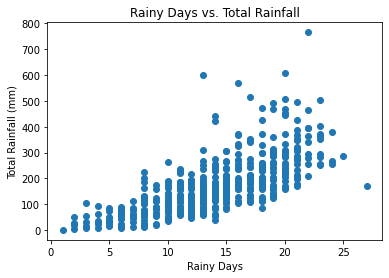

In [25]:
# Scatter plot: Rainy days vs. Total rainfall
plt.scatter(rain['no_of_rainy_days'], rain['total_rainfall'])
plt.xlabel('Rainy Days')
plt.ylabel('Total Rainfall (mm)')
plt.title('Rainy Days vs. Total Rainfall')
plt.show()

* Weak but positive relationship between the no_of_rainy_days and no_of_rainy_days ,seen to be stationary between 0 to about 8 days then expiriences a rise from 15 to about 23 days

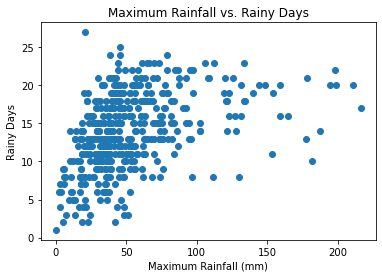

In [26]:
# Scatter plot: Maximum rainfall vs. Rainy days
plt.scatter(rain['maximum_rainfall_in_a_day'], rain['no_of_rainy_days'])
plt.xlabel('Maximum Rainfall (mm)')
plt.ylabel('Rainy Days')
plt.title('Maximum Rainfall vs. Rainy Days')
plt.show()

* Shows a moderate Positve Linear Relationship Between the two variables

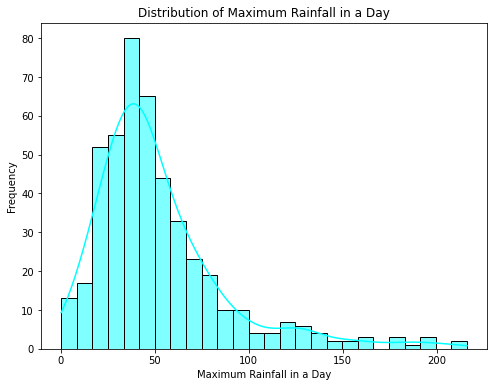

In [27]:
# Histogram plot- Maximum Rainfall in a Day
plt.figure(figsize=(8, 6))
sns.histplot(rain['maximum_rainfall_in_a_day'], kde=True,color = 'cyan')
plt.xlabel('Maximum Rainfall in a Day')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Rainfall in a Day')
plt.show()

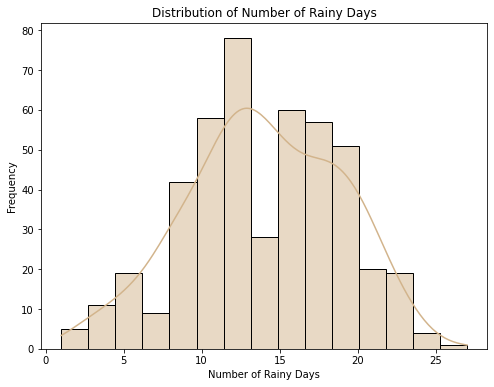

In [28]:
#Histogram plot - Number of Rainy Days
plt.figure(figsize=(8, 6))
sns.histplot(rain['no_of_rainy_days'], kde=True,color = 'tan')
plt.xlabel('Number of Rainy Days')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Rainy Days')
plt.show()


* The peak number of rainy days graphically can be seen somewhere around 12 days,10,16,17,18 with lowest around day 26

Mean Maximum Rainfall by Year:
year
1982    38.150000
1983    57.891667
1984    66.758333
1985    32.016667
1986    59.933333
1987    47.091667
1988    67.525000
1989    60.216667
1990    49.900000
1991    50.308333
1992    58.241667
1993    48.158333
1994    54.316667
1995    69.775000
1996    57.291667
1997    34.933333
1998    51.791667
1999    43.958333
2000    51.308333
2001    76.325000
2002    47.083333
2003    63.275000
2004    64.866667
2005    50.091667
2006    62.191667
2007    69.016667
2008    58.266667
2009    47.125000
2010    54.441667
2011    65.516667
2012    47.958333
2013    62.066667
2014    33.916667
2015    31.833333
2016    49.383333
2017    38.750000
2018    34.933333
2019    37.866667
2020    42.633333
Name: maximum_rainfall_in_a_day, dtype: float64


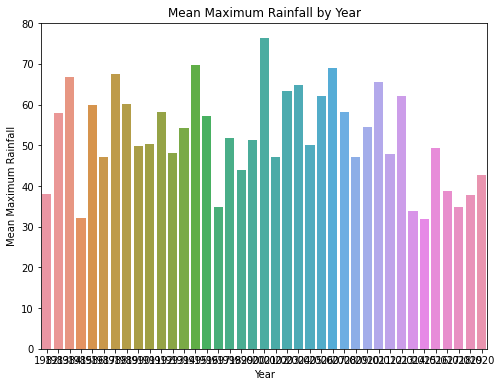

In [29]:
# Univariate EDA
# Groupby year and calculate mean maximum rainfall
mean_max_rainfall_by_year = rain.groupby('year')['maximum_rainfall_in_a_day'].mean()
print("Mean Maximum Rainfall by Year:")
print(mean_max_rainfall_by_year)

# Bar plot of mean maximum rainfall by year
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_max_rainfall_by_year.index, y=mean_max_rainfall_by_year.values)
plt.title('Mean Maximum Rainfall by Year')
plt.xlabel('Year')
plt.ylabel('Mean Maximum Rainfall')
plt.show()

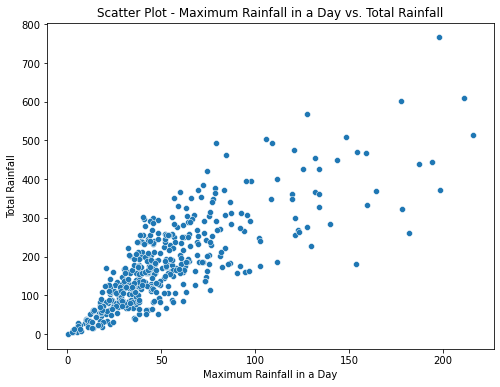

In [30]:
# Bivariate Analysis
# Scatter plot - Maximum Rainfall in a Day vs. Total Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x='maximum_rainfall_in_a_day', y='total_rainfall', data=rain)
plt.xlabel('Maximum Rainfall in a Day')
plt.ylabel('Total Rainfall')
plt.title('Scatter Plot - Maximum Rainfall in a Day vs. Total Rainfall')
plt.show()

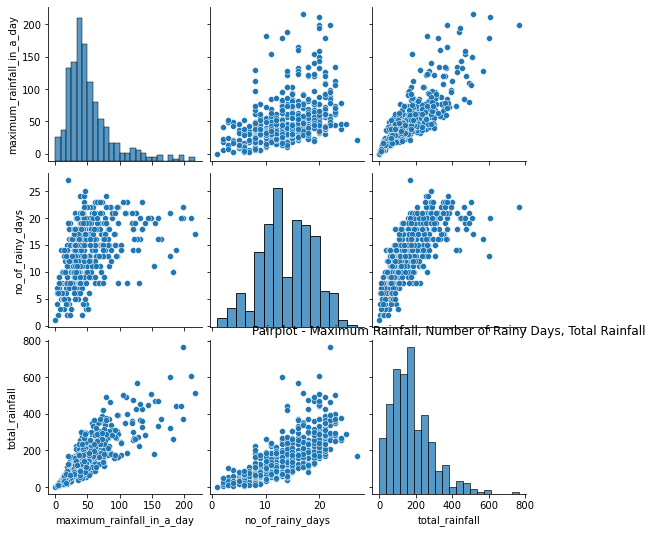

In [31]:
# Multivariate Analysis
# Pairplot - Maximum Rainfall in a Day, Number of Rainy Days, Total Rainfall
sns.pairplot(rain[['maximum_rainfall_in_a_day', 'no_of_rainy_days', 'total_rainfall']])
plt.title('Pairplot - Maximum Rainfall, Number of Rainy Days, Total Rainfall')
plt.show()

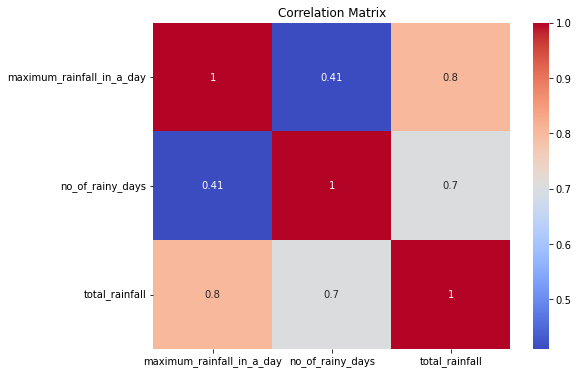

In [32]:
# Correlation matrix
correlation_matrix = rain[['maximum_rainfall_in_a_day', 'no_of_rainy_days', 'total_rainfall']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* Total Rainfall seems to have a high correlation  with maximum_rainfall_in_a_day (0.8)

In [33]:
#Using automated plotter ie SWEETVIZ.

                                             |                                             | [  0%]   00:00 ->…


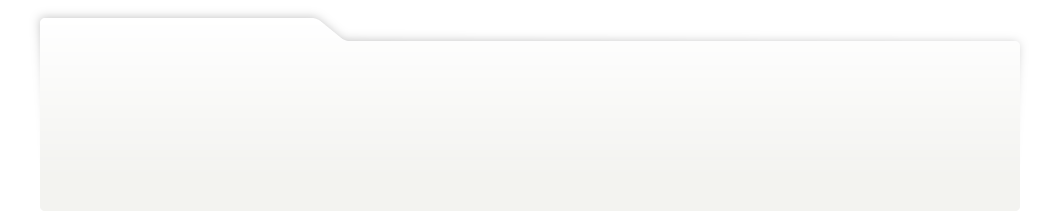
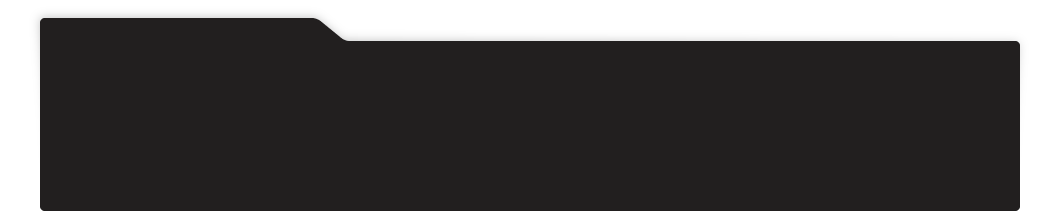
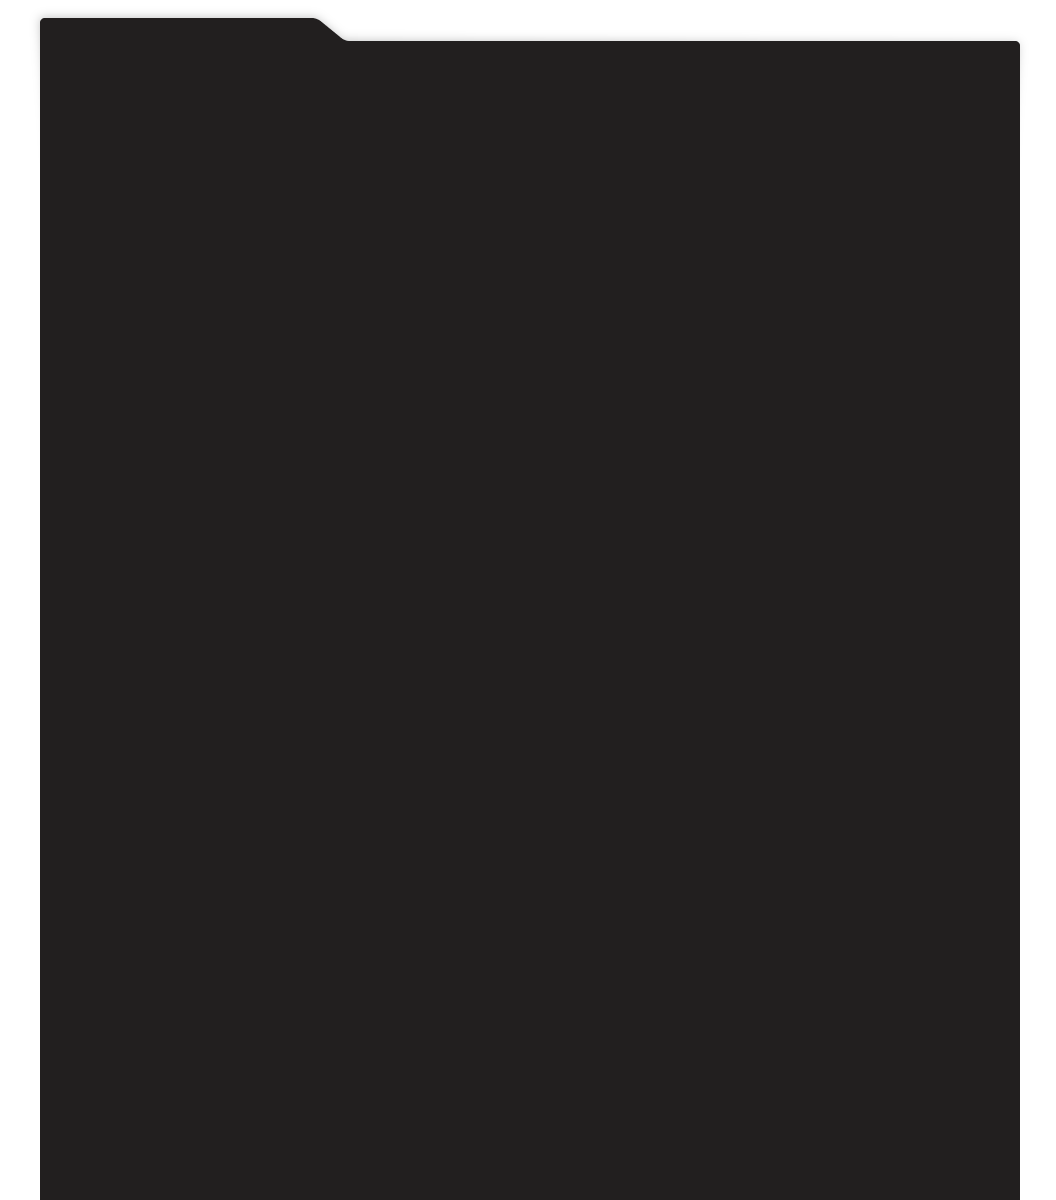
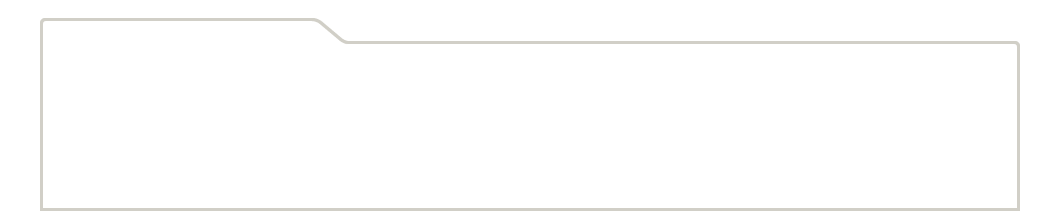
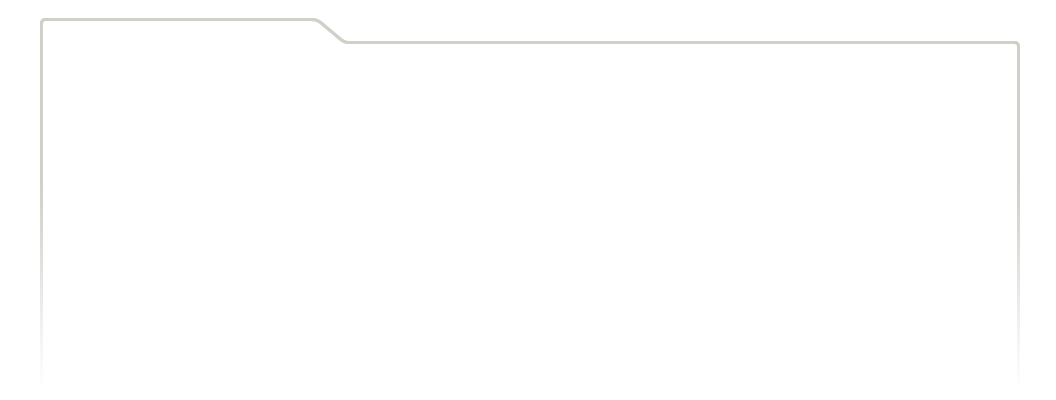
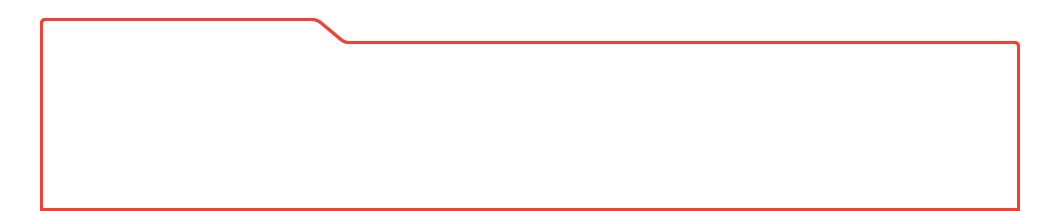
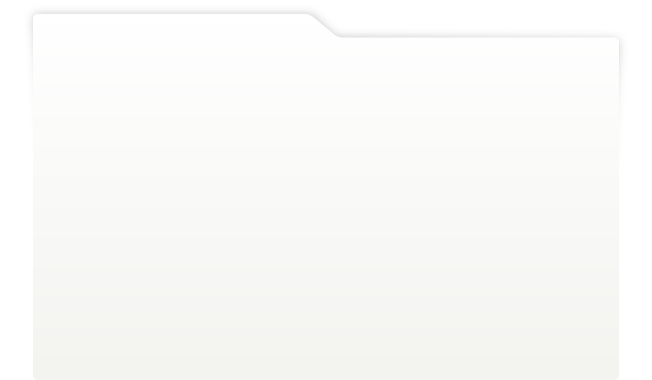
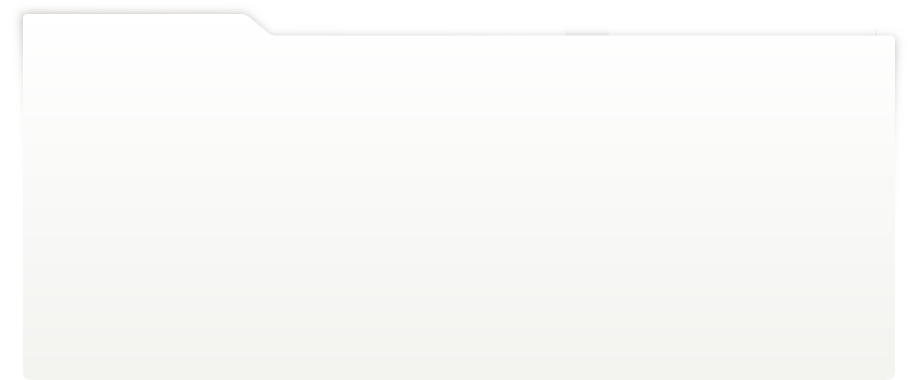
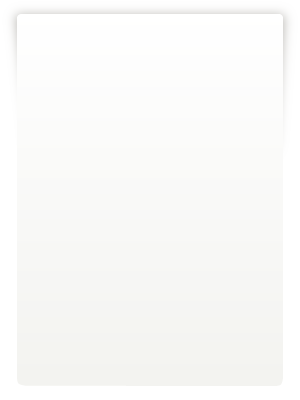
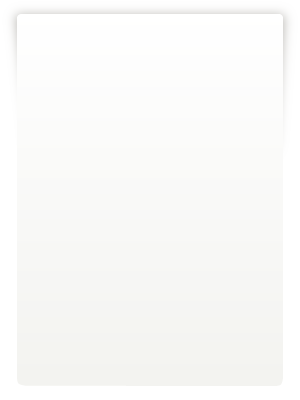
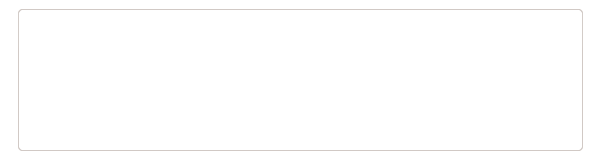
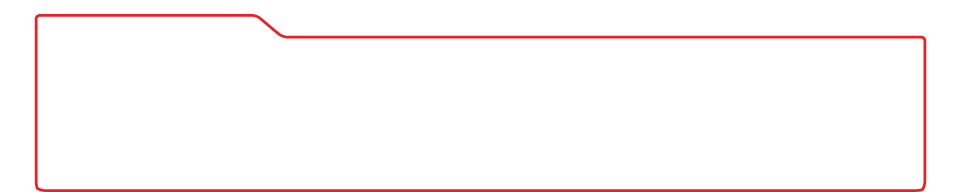
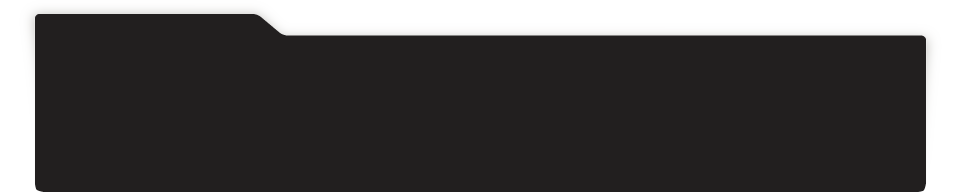
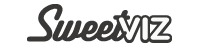
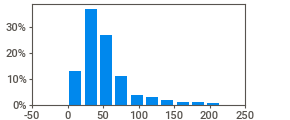
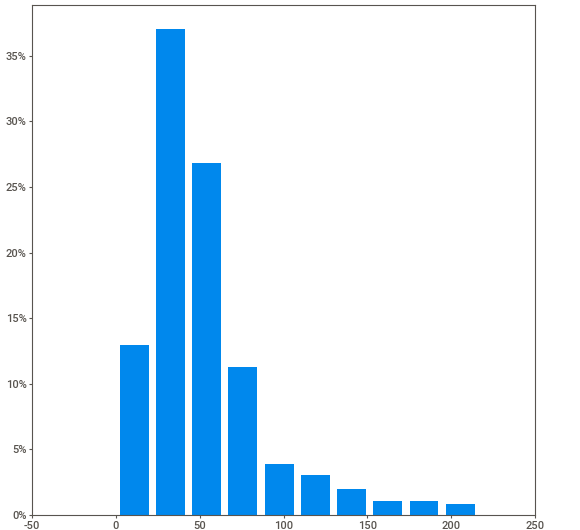
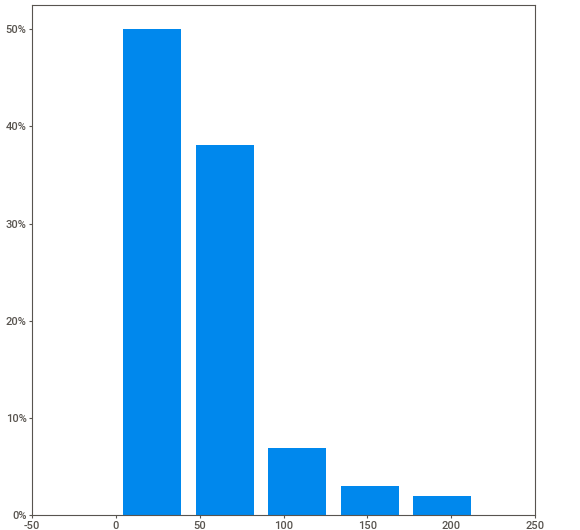
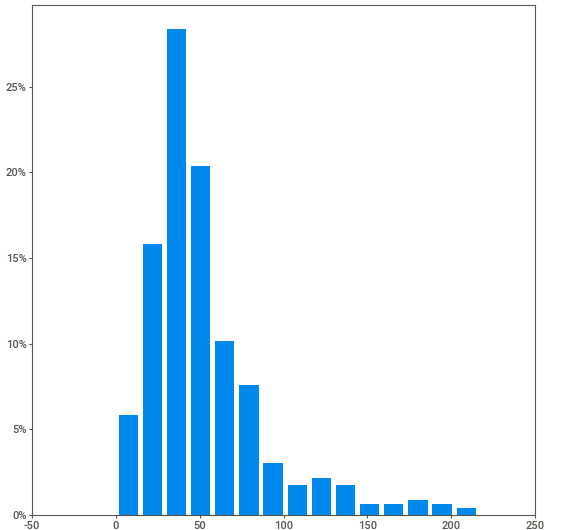
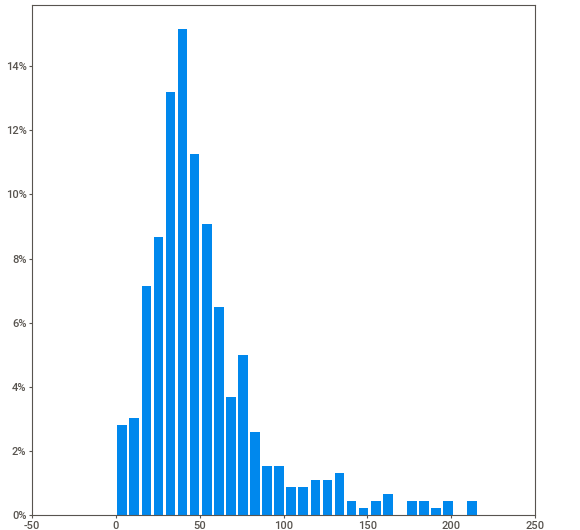
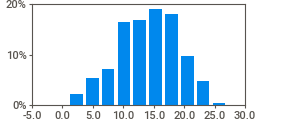
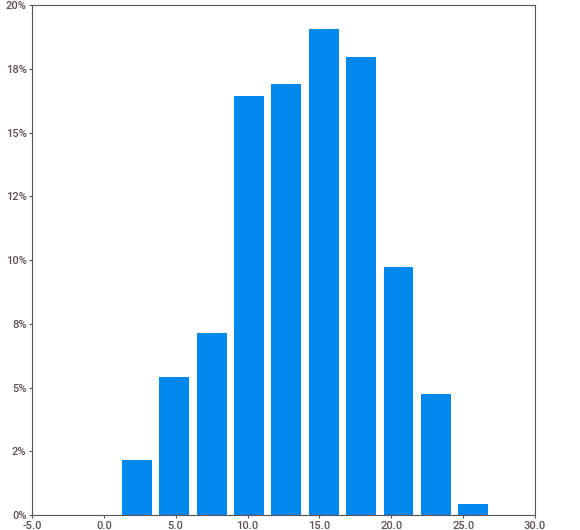
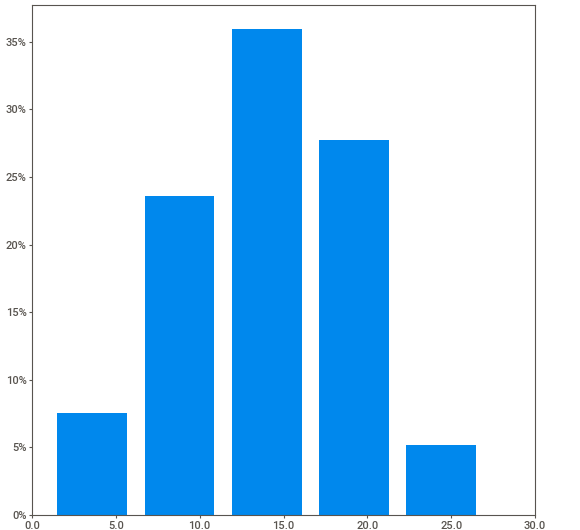
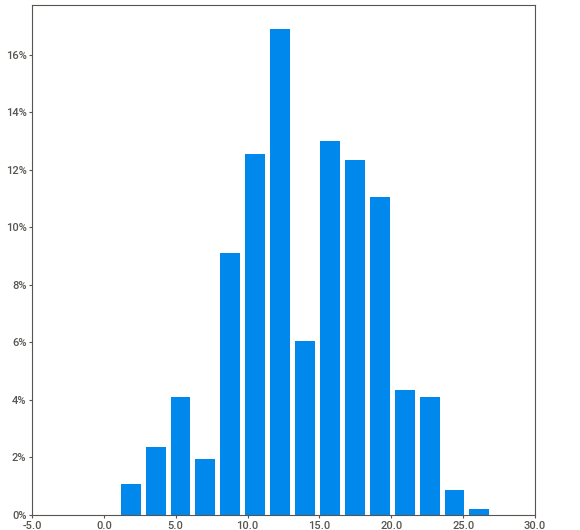
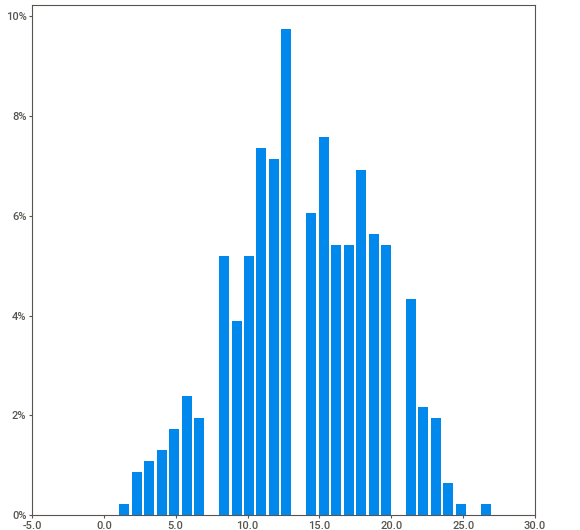
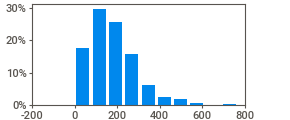
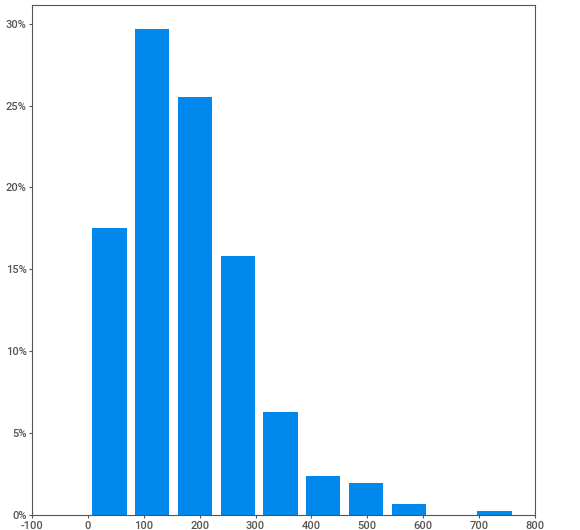
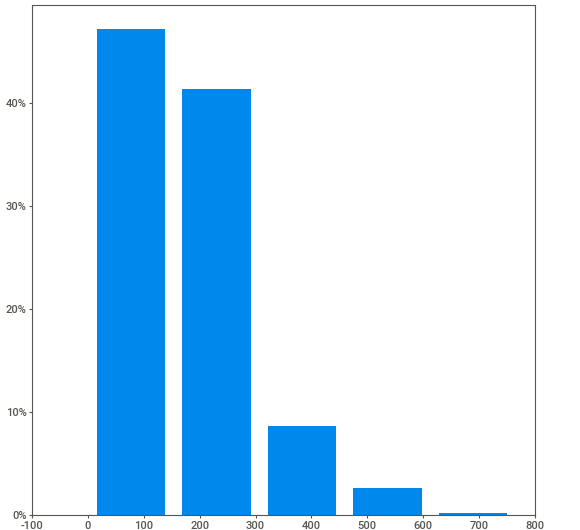
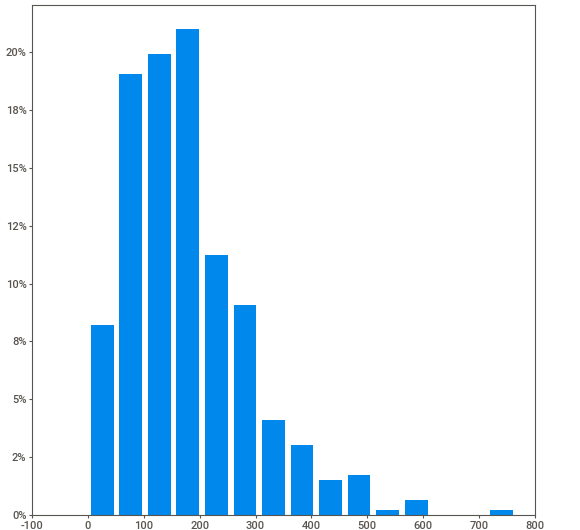
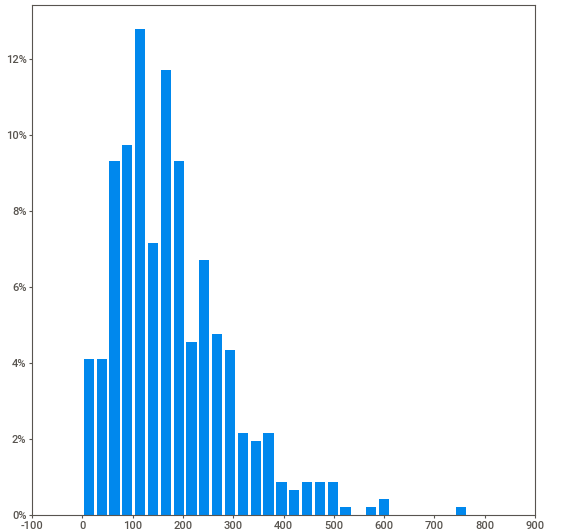
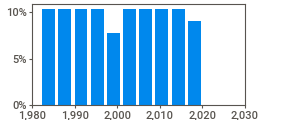
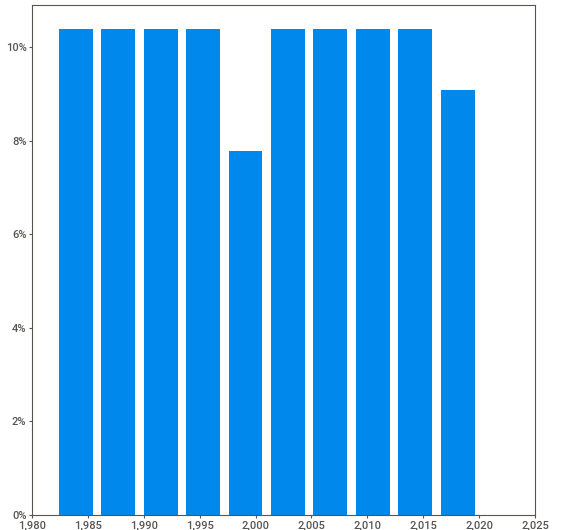
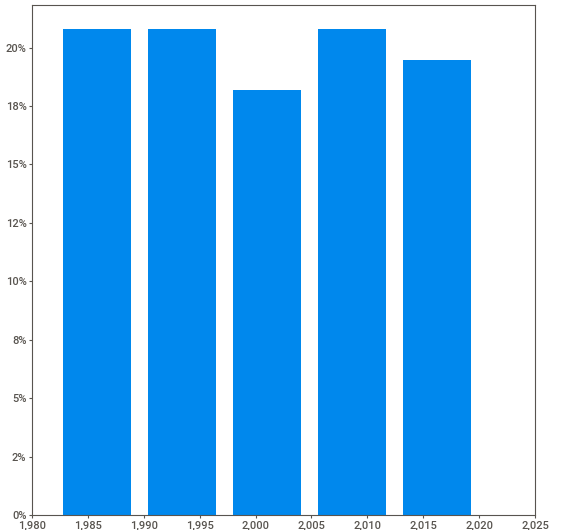
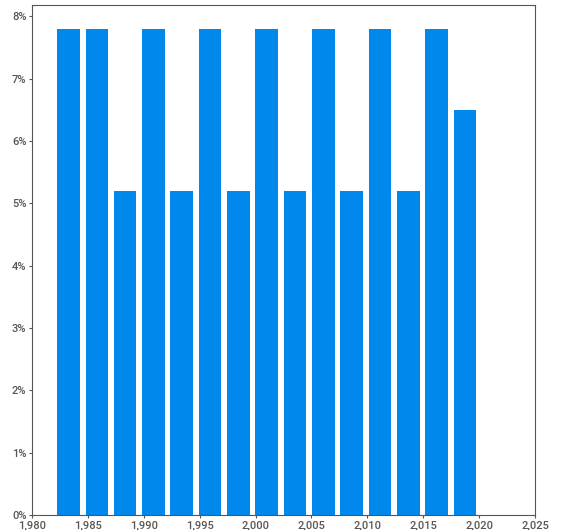
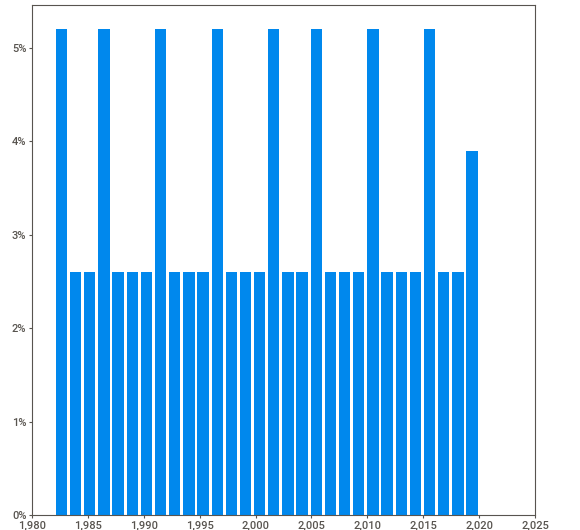
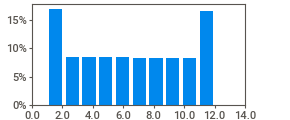
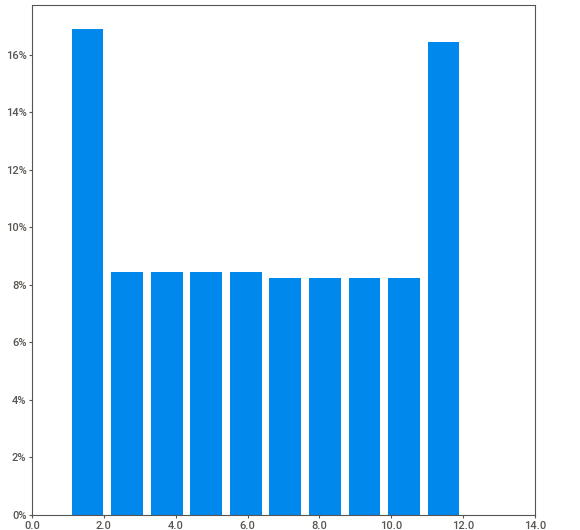
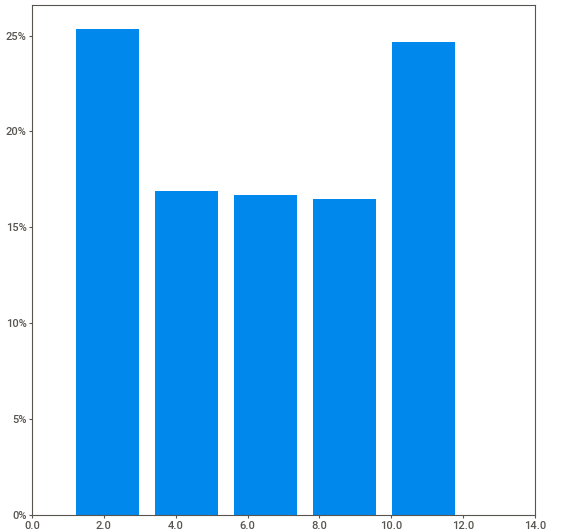
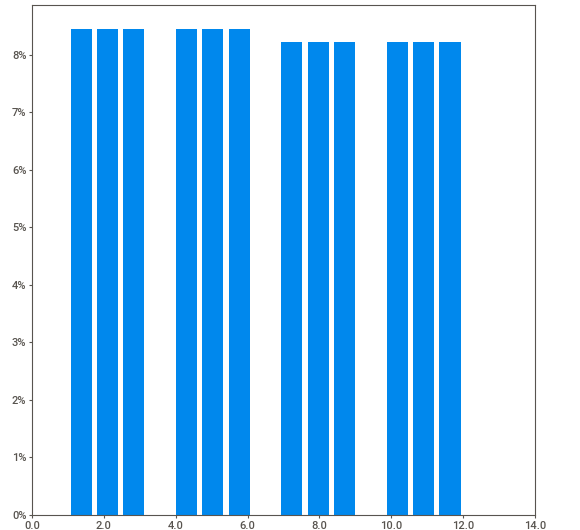
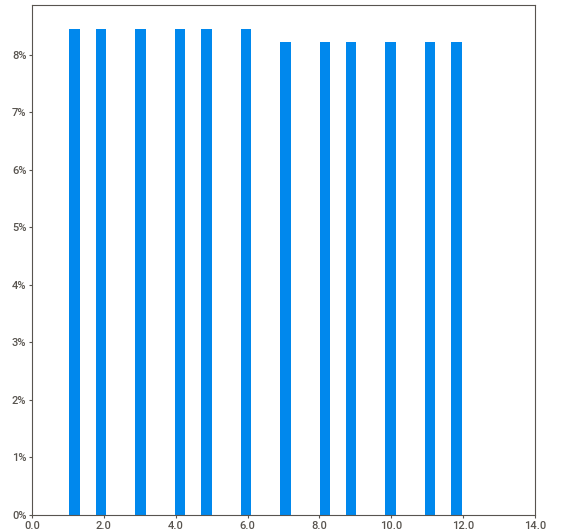
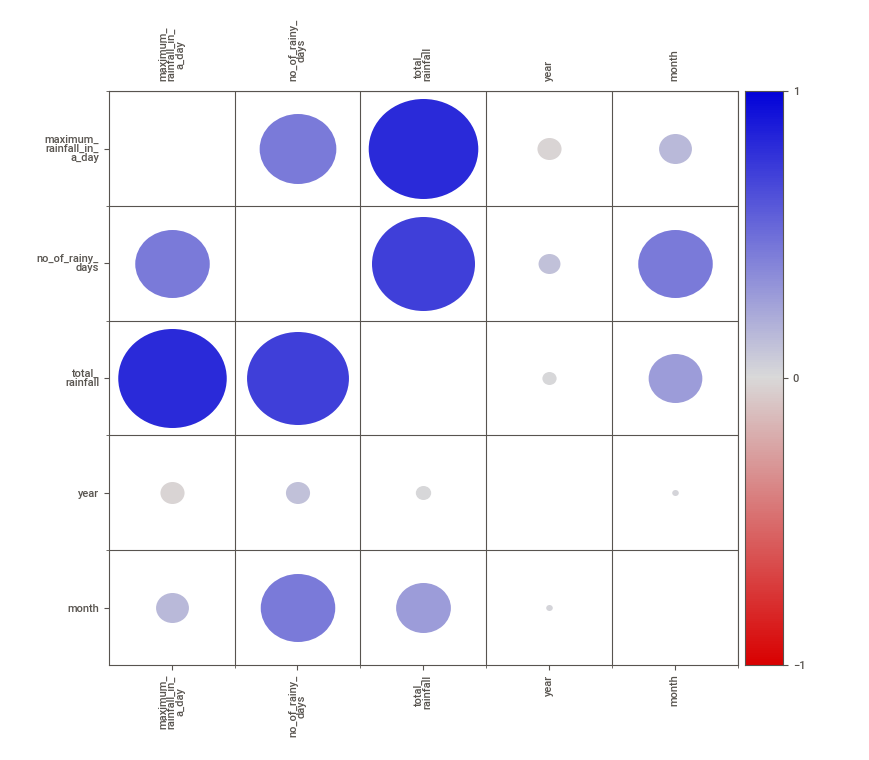
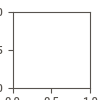

In [34]:
report = sv.analyze(rain)
report.show_notebook()

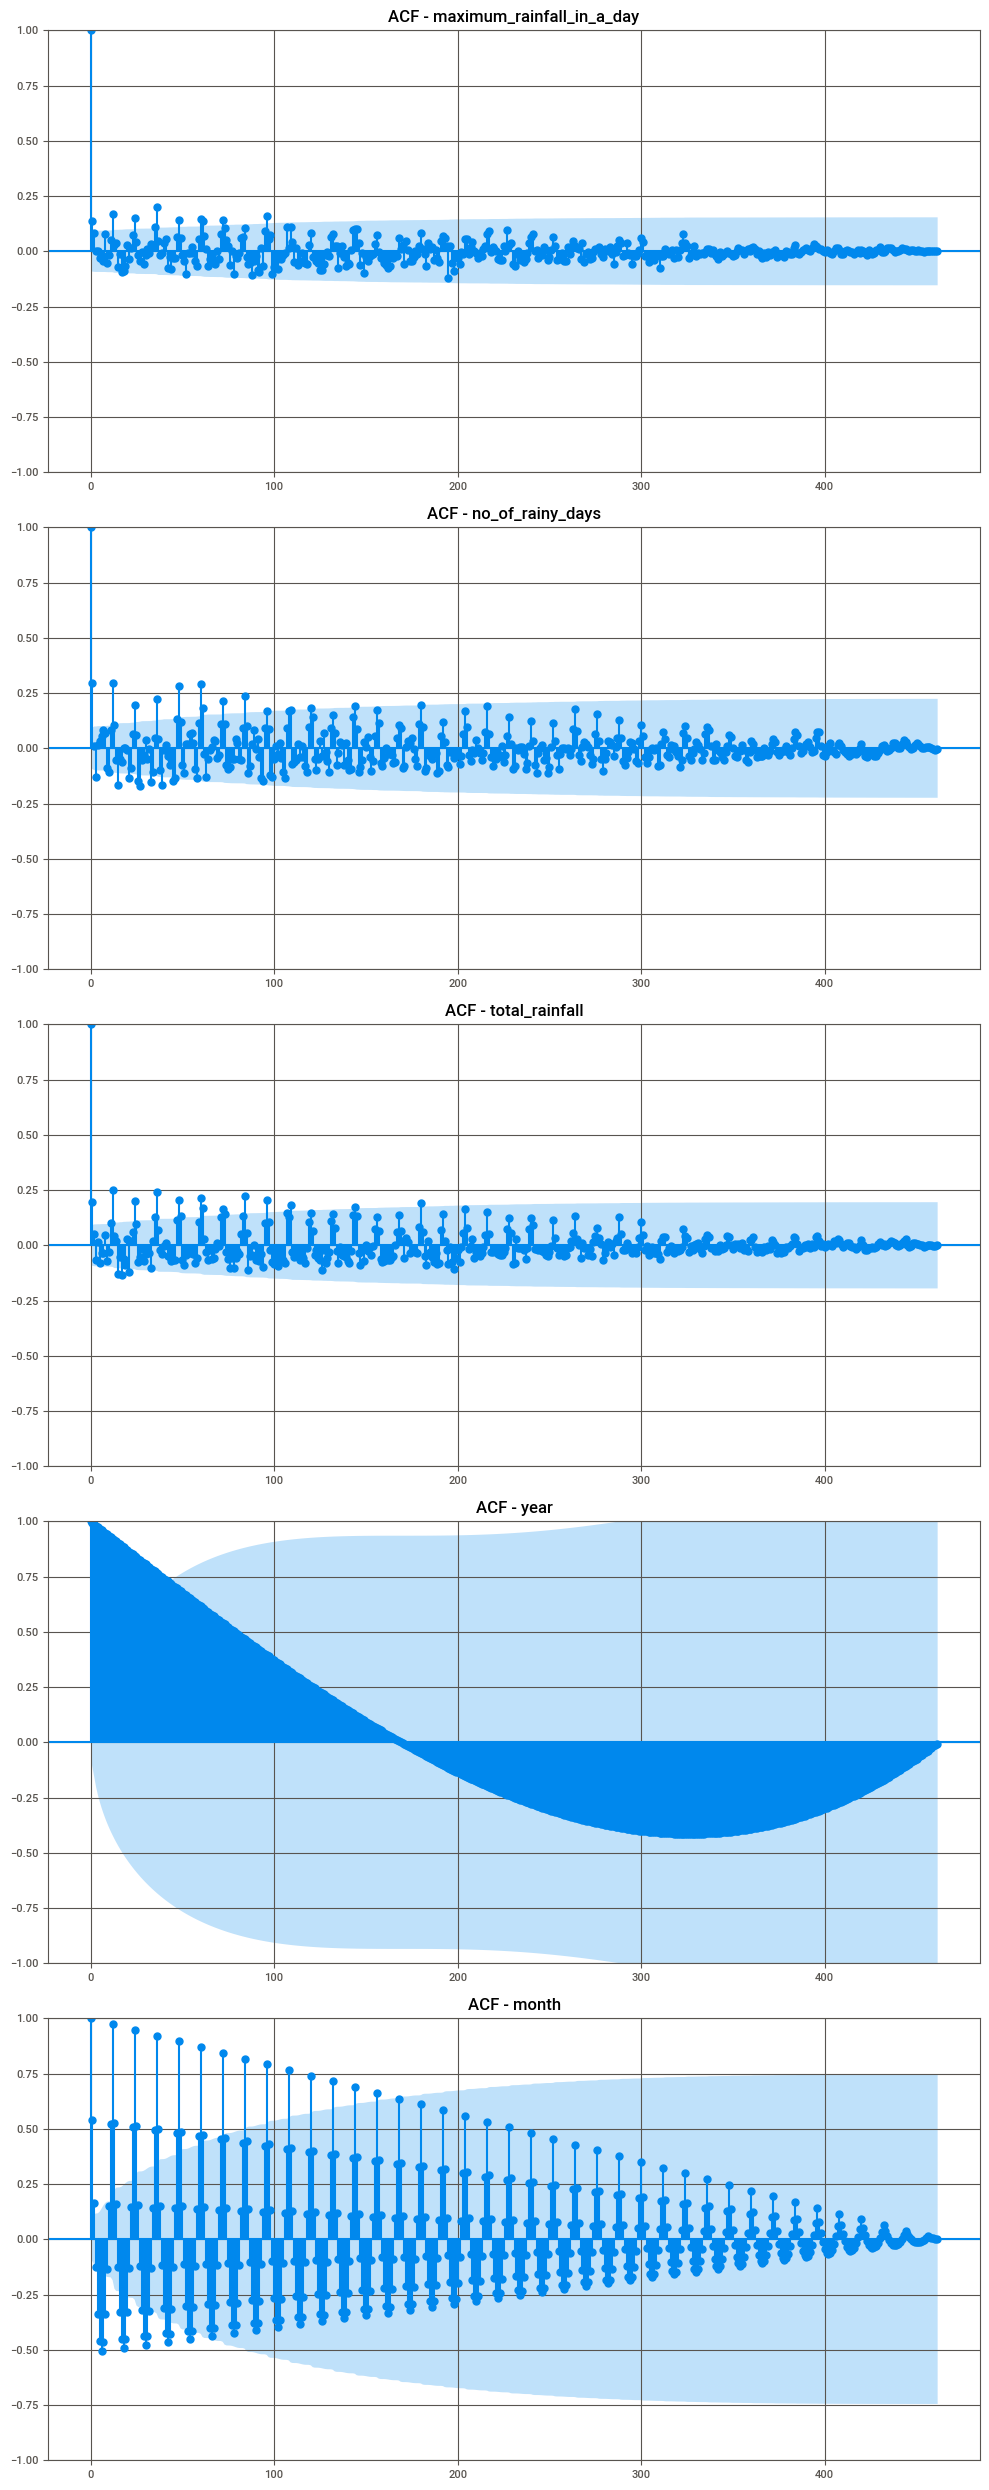

In [35]:
# Plotting ACF
fig, axes = plt.subplots(len(rain.columns), 1, figsize=(10, 5*len(rain.columns)))

for i, column in enumerate(rain.columns):
    ax = axes[i]
    plot_acf(rain[column], ax=ax, lags=len(rain)-1)
    ax.set_title(f'ACF - {column}')
    ax.grid(True)

plt.tight_layout()
plt.show()

## WITHOUT SCALING

### Feature Selection

In [36]:
# Split the data into features and target
X = rain[['maximum_rainfall_in_a_day', 'no_of_rainy_days', 'month','year']]
y = rain['total_rainfall']


In [37]:
X1 = X.copy()
y1 = y.copy()

In [38]:
X1.head()

maximum_rainfall_in_a_day  no_of_rainy_days  month  year
0                       36.5                10      1  1982
1                        9.4                 5      2  1982
2                       61.7                11      3  1982
3                       45.1                14      4  1982
4                       33.0                10      5  1982

In [39]:
y1.head()

0    107.1
1     27.8
2    160.8
3    157.0
4    102.2
Name: total_rainfall, dtype: float64

In [40]:
# Split the data into training and testing sets in the ratio of 80% to 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#Fitting the Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [42]:
#Assigning Prediction Variable
y_pred = model.predict(X_test)

In [43]:
# Convert predictions and actual values to binary classes based on a threshold
threshold = 0.5  # Adjust the threshold as needed
y_pred_binary = np.where(y_pred > threshold, 1, 0)
y_test_binary = np.where(y_test > threshold, 1, 0)

In [44]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
accuracy_percentage = accuracy * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 97.85%


In [45]:
# Print the predicted and actual values
predictions = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(predictions)

      Predicted  Actual
225  147.634519   120.9
30   151.047270   127.2
39   133.809482   110.5
222  120.816036   116.1
124   92.020432    63.1
..          ...     ...
22   222.565953   228.8
358  327.525592   377.8
46   220.949626   179.4
168  111.206538   173.2
347  238.271069   181.4

[93 rows x 2 columns]


* Showing the some sample predictions against Actual Values

In [46]:
# Get the coefficients (importance) of each feature
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                     Feature  Coefficient
0  maximum_rainfall_in_a_day     1.945997
1           no_of_rainy_days    10.304893
2                      month    -0.330497
3                       year    -0.113730


### With scaling

In [47]:
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X1)
y_sc = scaler.fit_transform(y1.values.reshape(-1,1))

In [48]:
scaled_df = pd.DataFrame(X_sc, columns=X1.columns)
scaled_df['scaled_target'] = y_sc

# Print the scaled DataFrame
print(scaled_df)

     maximum_rainfall_in_a_day  no_of_rainy_days     month  year  \
0                     0.168056          0.346154  0.000000   0.0   
1                     0.042593          0.153846  0.090909   0.0   
2                     0.284722          0.384615  0.181818   0.0   
3                     0.207870          0.500000  0.272727   0.0   
4                     0.151852          0.346154  0.363636   0.0   
..                         ...               ...       ...   ...   
457                   0.109259          0.269231  0.090909   1.0   
458                   0.218519          0.269231  0.181818   1.0   
459                   0.238889          0.423077  0.272727   1.0   
460                   0.248148          0.576923  0.363636   1.0   
461                   0.188889          0.769231  0.454545   1.0   

     scaled_target  
0         0.139611  
1         0.036045  
2         0.209743  
3         0.204780  
4         0.133211  
..             ...  
457       0.084628  
458       0.141

In [49]:
# Split the data into training and testing sets for scaled features and atrgets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sc, y_sc, test_size=0.2, random_state=42)

In [50]:
#Fitting scaled features
model1 = LinearRegression()
model1.fit(X_train1, y_train1)


LinearRegression()

In [51]:
y_pred1 = model1.predict(X_test1)

In [52]:
# Convert predictions and actual values to binary classes based on a threshold
threshold = 0.5  # Adjust the threshold as needed
y_pred_binary1 = np.where(y_pred1> threshold, 1, 0)
y_test_binary1 = np.where(y_test1 > threshold, 1, 0)

In [53]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test_binary1, y_pred_binary1)
accuracy_percentage = accuracy * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 91.40%


###  Using ANN MODEL(ARTIFICIAL NEURAL NETWORK)

In [54]:
# Build the ANN model
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_sc.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history= model.fit(X_train1, y_train1, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
12/12 [==============================] - 1s 5ms/step - loss: 0.0832
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0406
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0305
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0273
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0246
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0223
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 11/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 12/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 13/100
12/12 [=================

In [55]:
# Evaluate the model on the test set
loss = model.evaluate(X_train1, y_train1)
print('Test Loss:', loss)


12/12 [==============================] - 0s 2ms/step - loss: 0.0038
Test Loss: 0.0037553778383880854


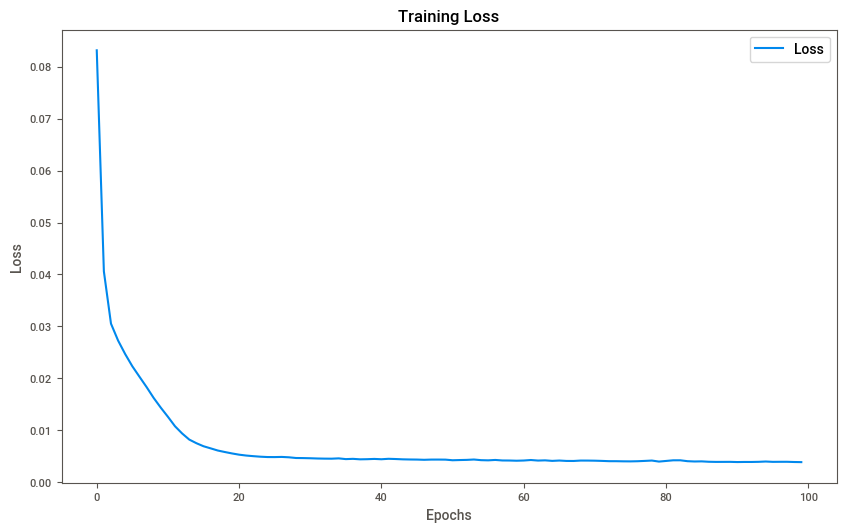

In [56]:
# Plot the loss and accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
# Make predictions on the testing set
predicted_values = model.predict(X_test1)

3/3 [==============================] - 0s 2ms/step


In [58]:
y_pred1 = model.predict(X_test1)

3/3 [==============================] - 0s 2ms/step


In [59]:
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test1, y_pred1)

print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.00


In [60]:
y_pred1= model.predict(X_test1)

3/3 [==============================] - 0s 3ms/step


In [61]:
# Convert predictions and actual values to binary classes based on a threshold
threshold = 0.5  # Adjust the threshold as needed
y_pred_binary1 = np.where(y_pred1 > threshold, 1, 0)
y_test_binary1 = np.where(y_test1 > threshold, 1, 0)

In [62]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
accuracy_percentage = accuracy * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 97.85%


In [63]:
#Predictions

In [75]:
# Generate future months for prediction
future_months = np.arange(6, 13)  # Assuming predicting the next 7 months

# Create the feature matrix for future months
future_features = pd.DataFrame({
    'maximum_rainfall_in_a_day': [0] * len(future_months),
    'no_of_rainy_days': [0] * len(future_months),
    'year': [2022] * len(future_months),
    'month': future_months
})

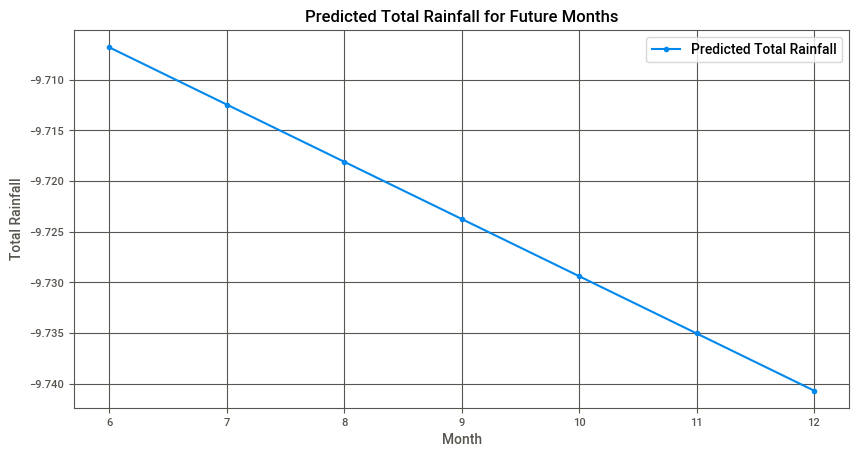

In [76]:
# Scale the future features
#future_features_scaled = scaler.transform(future_features)

# Make predictions for future months
predicted_rainfall = model1.predict(future_features)

# Plot the predicted total rainfall for future months
plt.figure(figsize=(10, 5))
plt.plot(future_months, predicted_rainfall, marker='o', linestyle='-', label='Predicted Total Rainfall')
plt.xlabel('Month')
plt.ylabel('Total Rainfall')
plt.title('Predicted Total Rainfall for Future Months')
plt.xticks(future_months)
plt.legend()
plt.grid(True)
plt.show()

* This Graph shows there will be dcrease in Total rainfall from 9th to 12 month
 - We voluntarily took a range from past time stamp to see the Graduations.

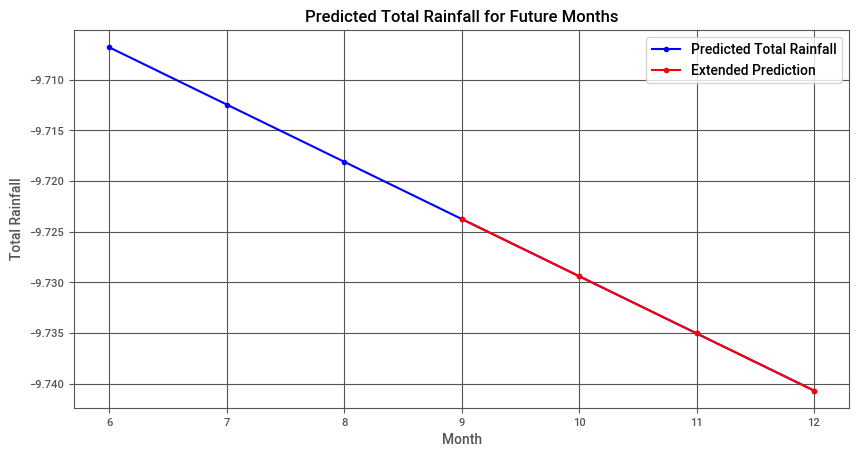

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(future_months, predicted_rainfall, marker='o', linestyle='-', color='blue', label='Predicted Total Rainfall')
plt.plot(future_months[3:], predicted_rainfall[3:], marker='o', linestyle='-', color='red', label='Extended Prediction')
plt.xlabel('Month')
plt.ylabel('Total Rainfall')
plt.title('Predicted Total Rainfall for Future Months')
plt.xticks(future_months)
plt.legend()
plt.grid(True)
plt.show()

* This Graph shows will be decrease Total Rainfall from the 9th to the 12th Month.
 - We voluntarily took a range from past time stamp to see the Graduations.

## Conclusion.

* Since target was a continuous vairable thats the reason we choose lgistic Regression for this Classification which gave a good accuracy
* scaling the data instead gave a poorer accuracy comparative to the to the unscaled data
* Accuarcy with ANN was equally good like Linear Regression and equally gaave a very small Loss of 0.003 indicating good Performance*

## THANK YOU.